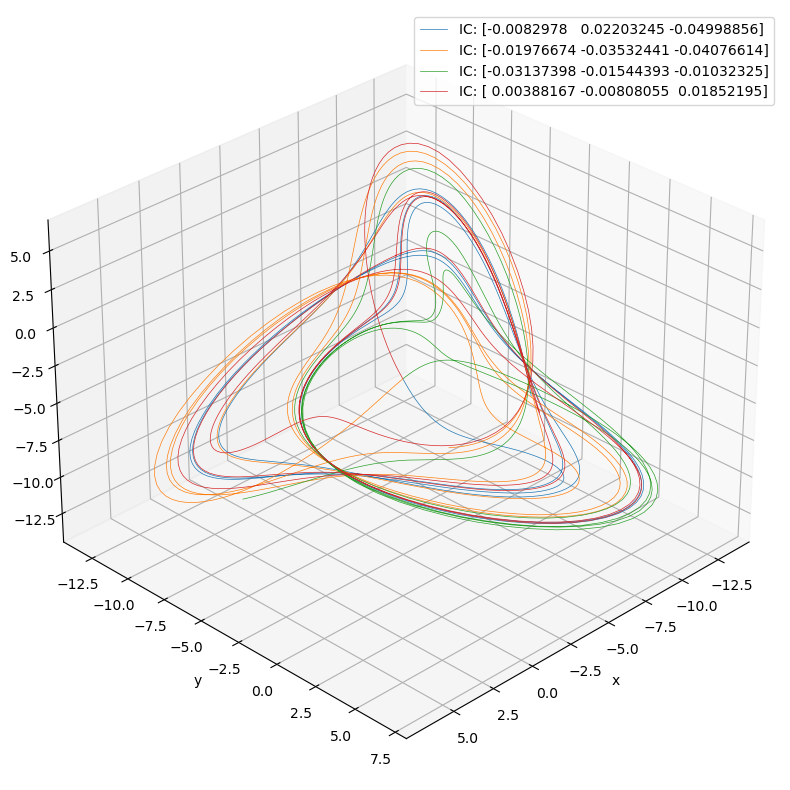

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def Halvorsen(t,curr_vals, a): 
    # Derivatives function for solve_ivp
    x,y,z = curr_vals 
    xdot = -a*x - 4*y - 4*z - y**2 
    ydot = -a*y - 4*z - 4*x - z**2
    zdot = -a*z - 4*x - 4*y - x**2
    return xdot,ydot,zdot

# Time Setup
tmax = 10
dt = 0.01
tspan = (0,tmax)
t = np.arange(0,tmax,dt)

# Parameters and initial conditions
a = 1.4
n_ics = 4 # number of initial conditions
n_dim = 3 # 3 dimensional problem
np.random.seed(1) # control randomness
initial_conditions = np.random.uniform(-0.05,0.05,(n_ics,n_dim)) # get n_ics initial conditions randomly from small box by the origin

# Call integrator for each initial condition
solutions = []
for initial_condition in initial_conditions:
    solved = solve_ivp(Halvorsen,tspan,initial_condition,t_eval = t, args = (a,))
    solutions.append(solved.y)

# Plotting
#%matplotlib widget ## UNCOMMENT TO BE ABLE TO PAN AROUND
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.view_init(30, 45) # Pick a nice initial viewing angle
for i,initial_condition in enumerate(initial_conditions):
    x,y,z = solutions[i]
    ax.plot3D(x,y,z, label = "IC: " +str(initial_condition),lw = 0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

In [2]:
## your code here

In [3]:
## your code here

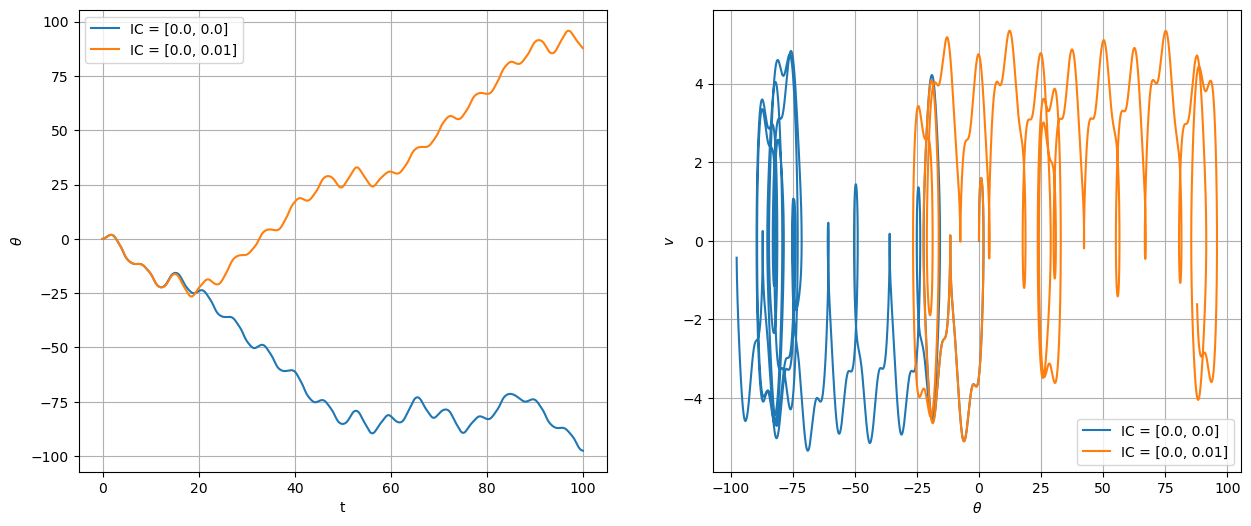

In [4]:
def DDP(t,curr_vals, beta,omega_natural,gamma,omega_drive): 
    # Derivatives function for solve_ivp
    theta,v = curr_vals 
    thetadot = v
    vdot = -2*beta*v - omega_natural * np.sin(theta) + gamma*omega_natural*np.cos(omega_drive*t)
    return thetadot,vdot

# Parameters and initial conditions (chosen so that they give chaos)
beta = 0.375/2
omega_natural = 1.5**2
omega_drive = 1
gamma = 1.5
initial_condition = [0.,0.]
initial_condition2 = [0.,0.01]

# Time Setup
tmax = 100.
dt = 0.01
t = np.arange(0,tmax, dt) 
tspan = (t[0],t[-1])

# Call integrator for each initial condition
solved = solve_ivp(DDP,tspan,initial_condition,t_eval = t, args = (beta,omega_natural,gamma,omega_drive))
solved2 = solve_ivp(DDP,tspan,initial_condition2,t_eval = t, args = (beta,omega_natural,gamma,omega_drive))

# Plotting
fig = plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(t,solved.y[0],label =  "IC = " + str(initial_condition))
plt.plot(t,solved2.y[0], label = "IC = " + str(initial_condition2) )
plt.xlabel("t")
plt.ylabel(r"$\theta$")
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(solved.y[0],solved.y[1], label =  "IC = " + str(initial_condition))
plt.plot(solved2.y[0],solved2.y[1], label = "IC = " + str(initial_condition2))
plt.xlabel(r"$\theta$")
plt.ylabel(r"$v$")
plt.legend()
plt.grid()
plt.show()

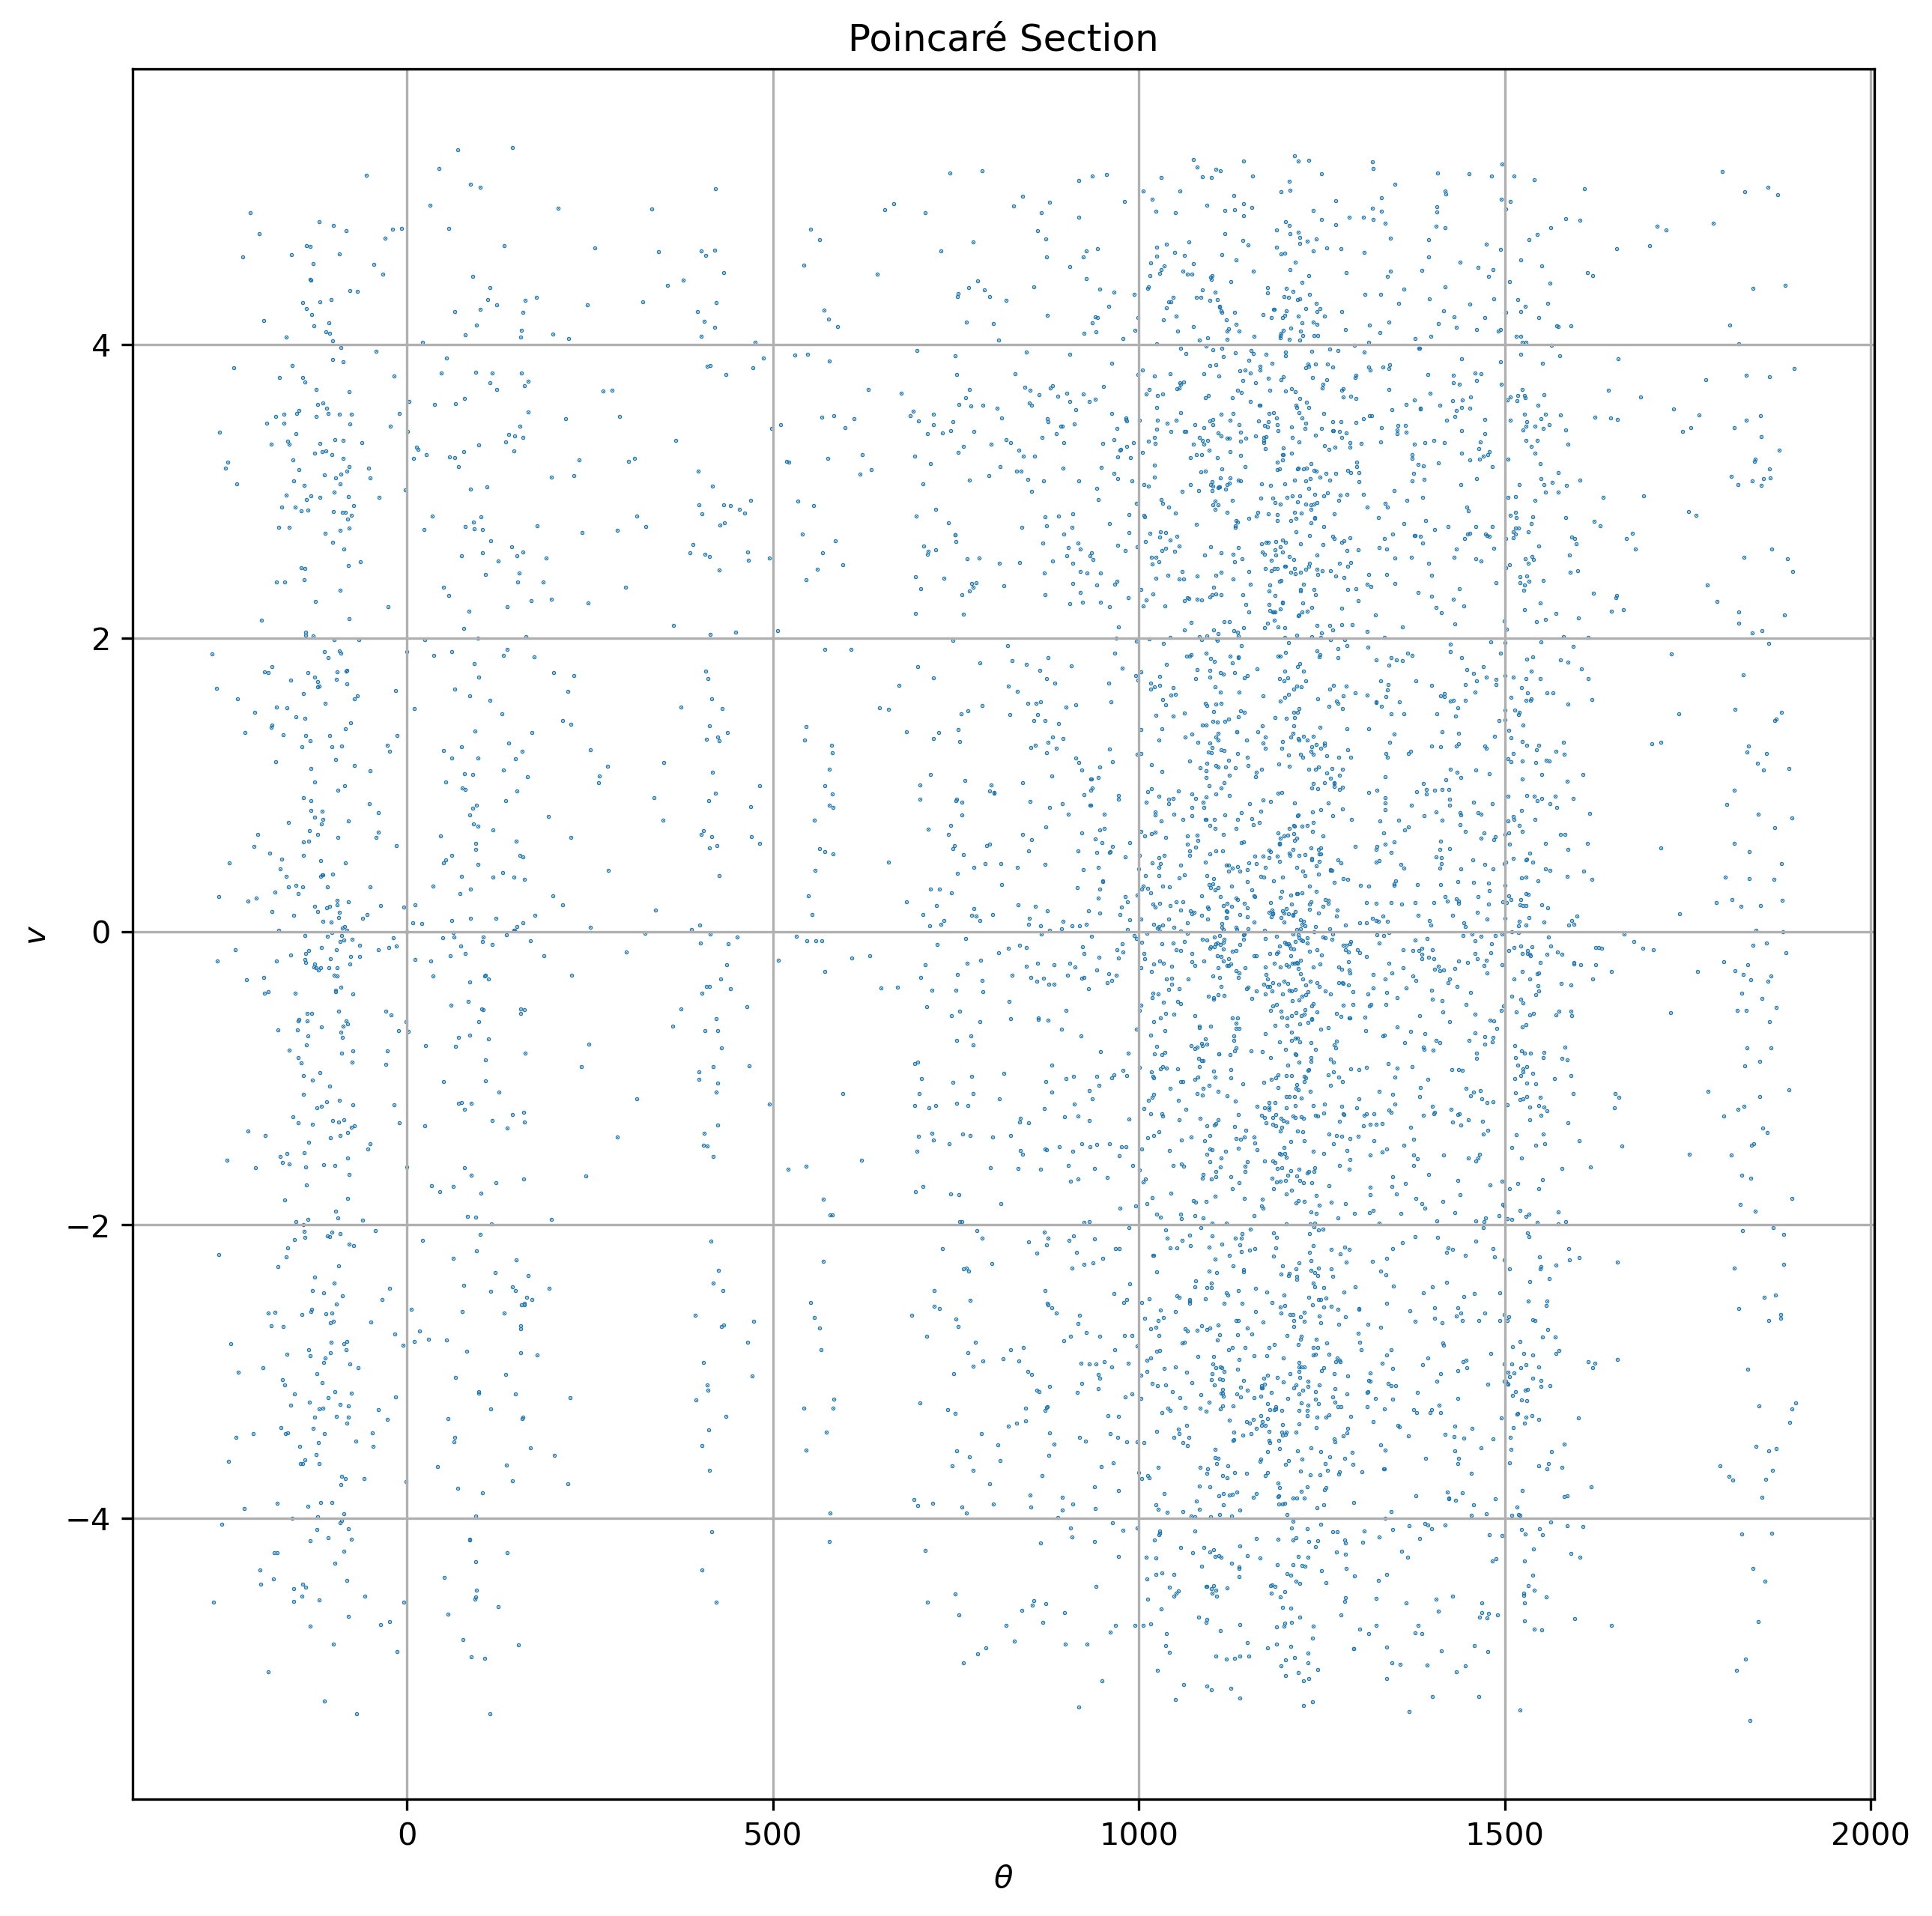

In [5]:
# Time Setup
N = 5000 # Number of Drive Periods to integrate for

##########
t_period = 2. ## CHANGE 
##########

t = np.linspace(0,N*t_period, N+1) # Note: this is not the same as the points used for integration, so we need not worry about this ruining our numerical accuracy
tspan = (t[0],t[-1])

# Call integrator for each initial condition
solved = solve_ivp(DDP,tspan,initial_condition,t_eval = t, args = (beta,omega_natural,gamma,omega_drive))

poincare_theta, v = solved.y[0],solved.y[1]

#######
poincare_theta = poincare_theta ## CHANGE
#######

# Plotting
fig = plt.figure(figsize = (10,10),dpi = 300)
plt.scatter(poincare_theta,v,s = 0.1)
plt.title("Poincaré Section")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$v$")
plt.grid()
plt.show()